# TASK 2 : KMEANS CLUSTERING

In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("football_data.csv")
df=df.select_dtypes(exclude=['object'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Age                       18207 non-null  int64  
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Special                   18207 non-null  int64  
 6   International Reputation  18159 non-null  float64
 7   Weak Foot                 18159 non-null  float64
 8   Skill Moves               18159 non-null  float64
 9   Jersey Number             18147 non-null  float64
 10  Crossing                  18159 non-null  float64
 11  Finishing                 18159 non-null  float64
 12  HeadingAccuracy           18159 non-null  float64
 13  ShortPassing              18159 non-null  float64
 14  Volley

The column unnamed and ID is of no use as it doesnot convey any important info to us and hence can be dropped !

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Potential                 18207 non-null  int64  
 3   Special                   18207 non-null  int64  
 4   International Reputation  18159 non-null  float64
 5   Weak Foot                 18159 non-null  float64
 6   Skill Moves               18159 non-null  float64
 7   Jersey Number             18147 non-null  float64
 8   Crossing                  18159 non-null  float64
 9   Finishing                 18159 non-null  float64
 10  HeadingAccuracy           18159 non-null  float64
 11  ShortPassing              18159 non-null  float64
 12  Volleys                   18159 non-null  float64
 13  Dribbling                 18159 non-null  float64
 14  Curve 

# Running K Means Clustering Algorithm

In [6]:
#k=no of initial clusters that are given
import random
#choose k random centres from the datalist
def choosecentres(datalist,k):
    indi=list()
    for i in range(1,k+1):
        random_num = random.choice(datalist[i]) 
        print (random_num)
        indi.append(random_num)
    return indi
#storing the centres
def storecentres(indi,X,k):
    centres=list()
    for i in range(k):
        temp=list(X[indi[i],:])
        centres.append(temp)
    #converting it to numpy
    centres=np.asarray(centres)
    print(centres.shape)
    return centres

In [105]:
def kmeans(X,centres,k):
    #find the distance from each of the centre and then add in the list corresponding to which the distance is minimum
    clusters=list()
    
    for i in range(k):
        clusters.append(list())#clusters formation

    centers_new=copy.deepcopy(centres) 
    #print(centers_new)
    for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        clusters[ind].append(i)
    n=X.shape[0]
    m=X.shape[1]
    #print(n)
    #print(m)
    #print(temp.shape)
    for i in range(k):
        temp=np.array(clusters[i])
        centers_new[i] = np.mean(temp, axis=0)
    #print(centers_new)
    
    
    return centers_new


In [93]:
#we will use this for cluster analysis
def intra_cluster_similarity(clusters):
    diameter = list()
    clusters=np.array(clusters)
    for grp in clusters:
        n = len(grp)
        max_dis = 0
        for i in range(n-1):
            for j in range(i+1 ,n):
                dist = np.linalg.norm(grp[i]-grp[j])
                max_dis = max(max_dis , dist)
        diameter.append(max_dis)
    return diameter

In [86]:
def inter_cluster_similarity(cen):
    dis = list()
    n = len(cen)
    for i in range(n-1):
        for j in range(i+1 ,n):
            dis.append(np.linalg.norm(cen[i]-cen[j]))
    return ( sum(dis) / len(dis))

In [39]:

df=df.dropna()
X=df.to_numpy()
from random import randint
from random import seed
#print(type(X))
centres=list()
seed(1)
for i in range(3):
    val=randint(0,len(X))
    centres.append(X[val])
import copy 
centres=np.array(centres)
#print(centres)
old=copy.deepcopy(centres)
centres=kmeans(X,centres,3)
error = np.linalg.norm(centres-old)
print("error:",error) 
max_itr=100
i=0
while(error!=0.0 and i<max_itr):
    centres=kmeans(X,centres,3) 
    error = np.linalg.norm(centres-old)
    print("error",error)
    old=copy.deepcopy(centres) 
    i=i+1




error: 32875.00702094619
error 46680.350632850634
error 7750.949997550173
error 4584.202138643113
error 3818.5914032885075
error 1988.466700974295
error 1341.2548493643815
error 1092.5310981091861
error 1135.8516762914949
error 1887.990678226471
error 2247.6565466684515
error 1727.135671147596
error 395.69149163403773
error 174.3339125484097
error 135.1268932483911
error 129.10608289631466
error 75.98891502836791
error 147.7899506955621
error 107.15750610036451
error 64.67764659963768
error 66.9529714750125
error 45.50264684707901
error 53.76408566533512
error 98.46191891073742
error 55.58423840252122
error 200.50969575938996
error 449.5617161933618
error 976.221968191969
error 1026.0328525518703
error 1193.7970003709017
error 1371.6318221013237
error 2087.116961484989
error 2552.0921154248613
error 466.984483001474
error 472.0068569275133
error 1625.2187706340305
error 2574.8220804564844
error 942.2710105540855
error 523.4428120503048
error 266.9672230753269
error 262.85921392316726
e

As we can see from above we didnot use PCA or any other technique and the time taken was very much. So lets bring down the features by using PCA and then begin with our analysis.

In [27]:

df=df.dropna()
X=df.to_numpy()
#scaling the values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
skillsPCA = pca.fit_transform(X)

In [29]:
PCA_dataset1 = pd.DataFrame(data =skillsPCA , columns = ['c1', 'c2'] )

In [31]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

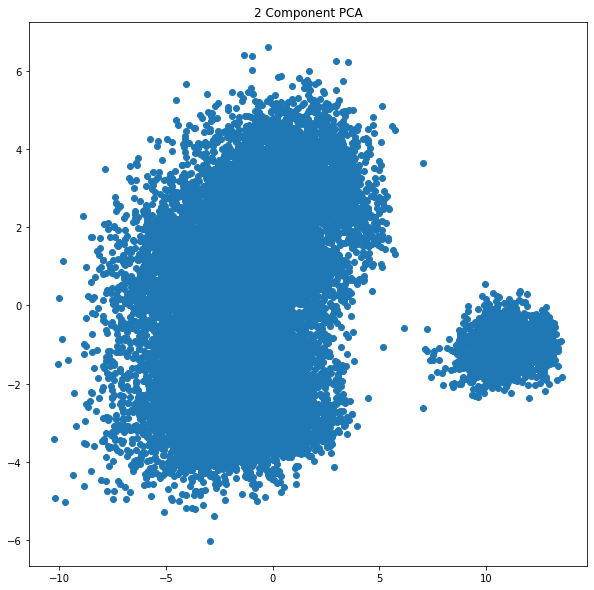

In [34]:
plt.figure()
plt.figure(figsize=(10,10))
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['c1'], PCA_dataset1['c2']) #c = y_kmeans, s=10)

# K=3

In [88]:
#finding the centres using kmeans 
X=PCA_dataset1.to_numpy()
from random import randint
from random import seed
centres=list()
seed(1)
for i in range(3):
    val=randint(0,len(X))
    centres.append(X[val])
import copy 
centres=np.array(centres)
#print(centres)
old=copy.deepcopy(centres)
centres=kmeans(X,centres,3)
error = np.linalg.norm(centres-old)
print("error:",error) 
max_itr=100
i=0
while(error!=0.0 and i<max_itr):
    centres=kmeans(X,centres,3) 
    error = np.linalg.norm(centres-old)
    print("error",error)
    old=copy.deepcopy(centres) 
    i=i+1

error: 5.070850321507406
error 6.670267704372154
error 1.7994775154528573
error 2.0414079070912132
error 2.5511870243747246
error 1.5555943684470943
error 0.48889461267445544
error 0.32428076225441566
error 0.2297663581146799
error 0.17291617899469497
error 0.11443740160378464
error 0.08438202116488891
error 0.062364553301971576
error 0.0498233618544913
error 0.029973299019181776
error 0.022415697623540322
error 0.018331409336307752
error 0.012199819877699193
error 0.010154724061318484
error 0.00921912984594487
error 0.0063899621836651455
error 0.0005825080623908025
error 0.0012839442334105701
error 0.0014187203084362516
error 0.0017136976451142772
error 0.0033700373350984934
error 0.0017822583058740814
error 0.00043662385923762
error 0.0


In [53]:
#finding the assigned centres
labels=list()
for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        labels.append(ind)

    Plotting the graph

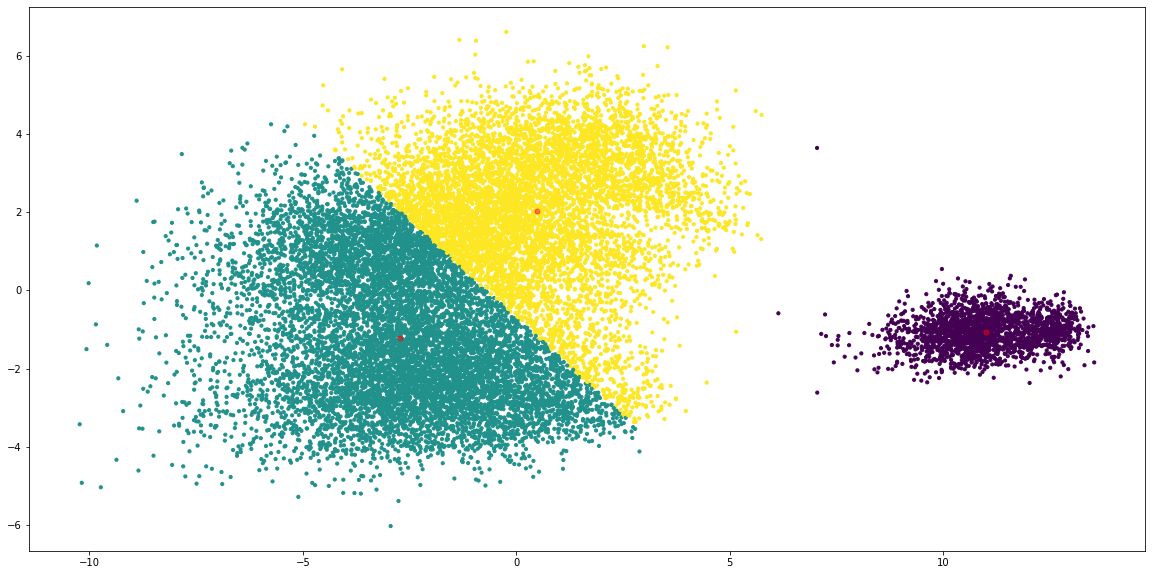

In [65]:
#finding the assigned centres
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(centres[:, 0], centres[:, 1], c='red', s=25, alpha=0.5);

The clusters are pretty well formed . Red coloured circles represent the specific centres.

Evaluating the Cluster i.e Cluster Analysis

In [94]:
#forming clusters
clusters=list()  
for i in range(k):
    clusters.append(list())#clusters formation
for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        clusters[ind].append(i)
#using these clusters finding inter and intra cluster distance
print(intra_cluster_similarity(clusters))
print(inter_cluster_similarity(centres))

<ipython-input-93-51b4c52d647d>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  clusters=np.array(clusters)


[8.503537156380618, 13.764599590632827, 11.90316356889481, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9.747433199000215


# K=5

In [95]:
#finding the centres using kmeans 
X=PCA_dataset1.to_numpy()
from random import randint
from random import seed
centres=list()
seed(1)
for i in range(5):
    val=randint(0,len(X))
    centres.append(X[val])
import copy 
centres=np.array(centres)
#print(centres)
old=copy.deepcopy(centres)
centres=kmeans(X,centres,5)
error = np.linalg.norm(centres-old)
print("error:",error) 
max_itr=100
i=0
while(error!=0.0 and i<max_itr):
    centres=kmeans(X,centres,5) 
    error = np.linalg.norm(centres-old)
    print("error",error)
    old=copy.deepcopy(centres) 
    i=i+1

error: 3.796538737698631
error 4.436273105675384
error 0.7005847111684804
error 0.450769024853797
error 0.29564291340895693
error 0.19923886545869296
error 0.14943905107190714
error 0.10261727943187637
error 0.07491367564442385
error 0.062079619669362776
error 0.04903933742574605
error 0.030334416306567243
error 0.02779826579293188
error 0.021402172014459608
error 0.01654677346404494
error 0.01299590920021356
error 0.010366998782125499
error 0.011096400664829309
error 0.004948778687303215
error 0.004371263026553656
error 0.0025435611846760598
error 0.0019833002763854964
error 0.0024342132110167355
error 0.0011166336165117654
error 0.0


In [67]:
#finding the assigned centres
labels=list()
for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        labels.append(ind)

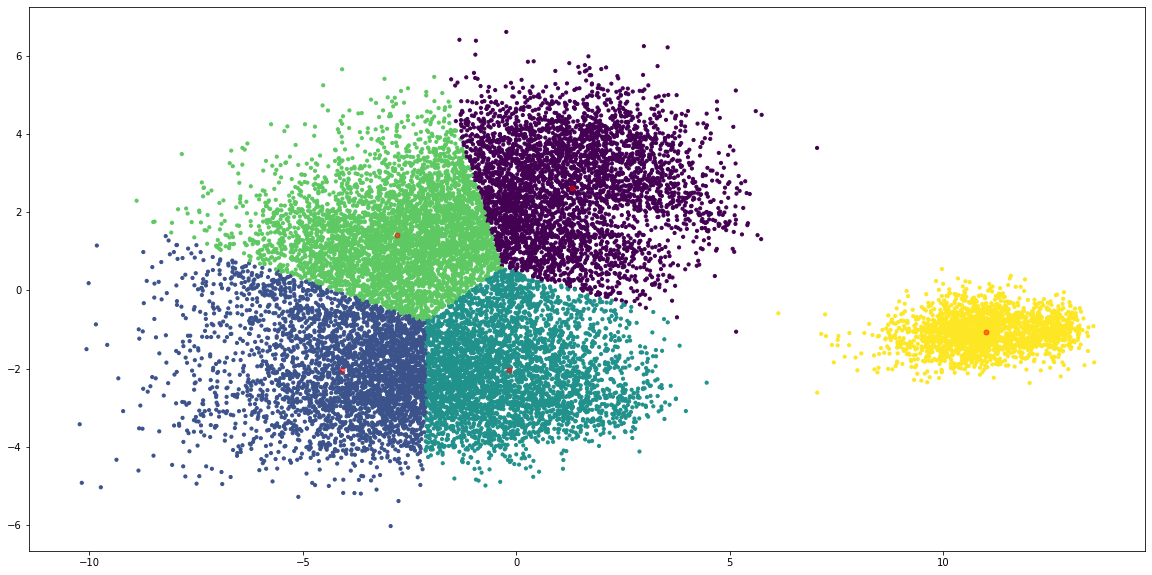

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(centres[:, 0], centres[:, 1], c='red', s=25, alpha=0.5);

In [96]:
#forming clusters
clusters=list()  
for i in range(k):
    clusters.append(list())#clusters formation
for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        clusters[ind].append(i)
#using these clusters finding inter and intra cluster distance
print(intra_cluster_similarity(clusters))
print(inter_cluster_similarity(centres))

<ipython-input-93-51b4c52d647d>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  clusters=np.array(clusters)


[9.89121106198221, 9.94682566554108, 6.811003733415643, 8.72820578412055, 7.5067894484585995, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7.8916465874035


# K=7

In [97]:
#finding the centres using kmeans 
X=PCA_dataset1.to_numpy()
from random import randint
from random import seed
centres=list()
seed(1)
for i in range(7):
    val=randint(0,len(X))
    centres.append(X[val])
import copy 
centres=np.array(centres)
#print(centres)
old=copy.deepcopy(centres)
centres=kmeans(X,centres,7)
error = np.linalg.norm(centres-old)
print("error:",error) 
max_itr=100
i=0
while(error!=0.0 and i<max_itr):
    centres=kmeans(X,centres,7) 
    error = np.linalg.norm(centres-old)
    print("error",error)
    old=copy.deepcopy(centres) 
    i=i+1

error: 2.289220445365141
error 2.9004130246217654
error 0.5331519103075139
error 0.36149306609450227
error 0.29037605798368293
error 0.2603966510900756
error 0.20835534172051273
error 0.16330983709936595
error 0.11902471038265869
error 0.08892802436186778
error 0.06813263368051309
error 0.05575466987176149
error 0.03933488973365554
error 0.030751193749976286
error 0.02369607717455227
error 0.015155059273536432
error 0.01298904762357329
error 0.012661361671765663
error 0.01072007035558527
error 0.007971817157612497
error 0.007519785503414451
error 0.0059706421564911
error 0.005180826250011667
error 0.0020391621332717658
error 0.0022128140481673018
error 0.002238011419726974
error 0.0


In [70]:
#finding the assigned centres
labels=list()
for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        labels.append(ind)

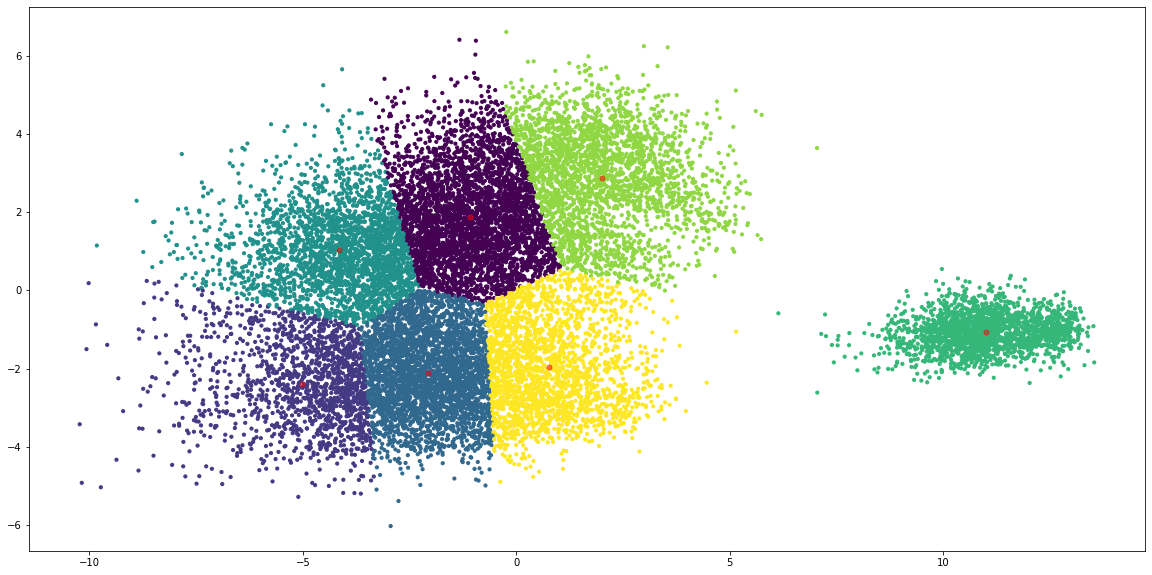

In [71]:
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(centres[:, 0], centres[:, 1], c='red', s=25, alpha=0.5);

In [98]:
#forming clusters
clusters=list()  
for i in range(7):
    clusters.append(list())#clusters formation
for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        clusters[ind].append(i)
#using these clusters finding inter and intra cluster distance
print(intra_cluster_similarity(clusters))
print(inter_cluster_similarity(centres))

<ipython-input-93-51b4c52d647d>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  clusters=np.array(clusters)


[6.720538598034652, 8.348112585908922, 6.0827636109284695, 7.616387440447447, 7.5067894484585995, 7.986377287373859, 6.731041907924012]
7.096691681547637


# Finding Optimal Number of Clusters

We are using inbuilt KMeans for finding the optimal clusters using the elbow method

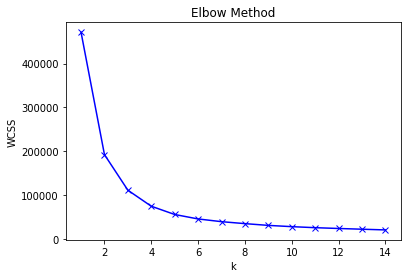

In [80]:

from sklearn.cluster import KMeans
wcss = []
K = range(1, 15) 
for k in K:
    KM = KMeans(n_clusters = k)
    KM = KM.fit(X)
    wcss.append(KM.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method');

From the elbow method we can conclude that the optimal number of clusters is 4.

# Silhoutte Score to get the optimal number of clusters

In [83]:
K = range(2, 15)
x=list()
y=list()
from sklearn.metrics import silhouette_samples, silhouette_score
for k in K:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(X)
    x.append(k)
    silhouette_avg = silhouette_score(X,labels)
    print("For K = ", k, " Average score: ", silhouette_avg)
    y.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, labels)
 

For K =  2  Average score:  0.6699470228452696
For K =  3  Average score:  0.434761056644774
For K =  4  Average score:  0.4410236248685975
For K =  5  Average score:  0.43658209172665474
For K =  6  Average score:  0.42001571227926565
For K =  7  Average score:  0.40905112612147876
For K =  8  Average score:  0.4002049143902741
For K =  9  Average score:  0.39838231350901787
For K =  10  Average score:  0.3957168593793883
For K =  11  Average score:  0.3883505674838323
For K =  12  Average score:  0.38629832230200895
For K =  13  Average score:  0.38735547483346716
For K =  14  Average score:  0.3433440257126878


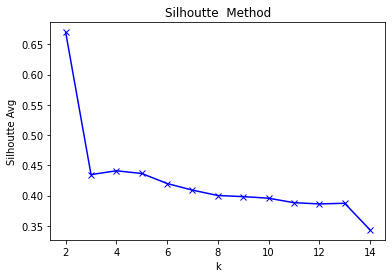

In [84]:
plt.plot(x,y, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhoutte Avg')
plt.title('Silhoutte  Method');

From here also we can conclude the value of K as 2 as the silhoutte score is highest for this value.

# Final Conclusions from KMeans and Clustering 

The optimal value of K is 4 and 2 .Now we will use these value of K to draw conclusions from the entire data and we will be using all the features for KMeans Clustering. We will scale the data for use though but not apply PCA

In [140]:
df=pd.read_csv("football_data.csv")
cols=[21]
cols += range(54, 83)
df = df.iloc[:, cols]
df = df.dropna()
position = np.array(df['Position'])
data = df.drop(['Position'], axis = 1)
#scaling the data for better results
X=data.to_numpy()
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data.to_numpy())

In [141]:
from collections import Counter
#calling k means
centres=list()
seed(1)
for i in range(2):
    val=randint(0,len(X))
    centres.append(X[val])
import copy 
centres=np.array(centres)
#print(centres)
old=copy.deepcopy(centres)
centres=kmeans(X,centres,2)
error = np.linalg.norm(centres-old)
print("error:",error) 
max_itr=100
i=0
while(error!=0.0 and i<max_itr):
    centres=kmeans(X,centres,2) 
    error = np.linalg.norm(centres-old)
    print("error",error)
    old=copy.deepcopy(centres) 
    i=i+1

error: 9.717226842020843
error 11.223945442743748
error 1.7077159405464748
error 1.3392339217636886
error 1.0986248809928303
error 0.9147455806169458
error 0.7730708043841693
error 0.727360489591238
error 0.6318753927242803
error 0.5318621773669099
error 0.5037199856328611
error 0.5217313201547241
error 0.5115706368796705
error 0.4117570901503865
error 0.4012500566148624
error 0.3648434717660825
error 0.27781782427595264
error 0.21729645977970238
error 0.18392211701608305
error 0.14846081917509193
error 0.13723443658780315
error 0.07207298407298862
error 0.06875194698436471
error 0.028363949293577818
error 0.00460021735688924
error 0.005020916681225997
error 0.0


In [142]:
labels=list()
for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        labels.append(ind)

In [143]:
comp = []
for i in range(0, len(position)):
    ele = tuple((position[i], labels[i]))
    comp.append(ele)

In [144]:
clusts= {}
#adding 4 empty dicts 1 for each cluster
clusts[0]={}
clusts[1]={}
for i in comp:
    d = clusts[i[1]]
    if i[0] not in d.keys():
        clusts[i[1]][i[0]] = 1
    else :
        clusts[i[1]][i[0]] += 1


In [145]:
import plotly.express as px
print("Cluster 1")
pos=list()
count=list()
for j in clusts[0]:
    pos.append(j)
    count.append(clusts[0][j])
    #making a pandas df to store this
d = pd.DataFrame()
d['pos'] = pos
d['count'] = count
d = d.sort_values(by=['count'])
fig = px.bar(d, x="count", y="pos",title="Cluster "+str(0),width=600,height=400)
fig.show()


Cluster 1


In [146]:
print("Cluster 2")
pos=list()
count=list()
for j in clusts[1]:
    pos.append(j)
    count.append(clusts[1][j])
    #making a pandas df to store this
d = pd.DataFrame()
d['pos'] = pos
d['count'] = count
d = d.sort_values(by=['count'])
fig = px.bar(d, x="count", y="pos",title="Cluster "+str(1),width=600,height=400)
fig.show()


Cluster 2


# Now lets see for K=4 as well 

In [147]:
df=pd.read_csv("football_data.csv")
cols += range(54, 83)
df = df.iloc[:, cols]
df = df.dropna()
position = np.array(df['Position'])
data = df.drop(['Position'], axis = 1)
#scaling the data for better results
X=data.to_numpy()
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data.to_numpy())

In [148]:
from collections import Counter
#calling k means
centres=list()
seed(1)
for i in range(4):
    val=randint(0,len(X))
    centres.append(X[val])
import copy 
centres=np.array(centres)
#print(centres)
old=copy.deepcopy(centres)
centres=kmeans(X,centres,4)
error = np.linalg.norm(centres-old)
print("error:",error) 
max_itr=100
i=0
while(error!=0.0 and i<max_itr):
    centres=kmeans(X,centres,4) 
    error = np.linalg.norm(centres-old)
    print("error",error)
    old=copy.deepcopy(centres) 
    i=i+1

error: 14.995468855867689
error 18.025416914397688
error 2.839153471698788
error 2.410668301868213
error 2.362454565284776
error 2.3058474198194303
error 2.1408692631381796
error 1.6052912335043326
error 1.2308174362705342
error 0.9197627497305363
error 0.6575455327677272
error 0.45443349358505
error 0.34256173684826063
error 0.23549999736066055
error 0.20752191677103746
error 0.16029458434470517
error 0.12001161034788682
error 0.09667115776959566
error 0.06480131402015589
error 0.05346621403157694
error 0.04456408623180985
error 0.028887785375092
error 0.024472119792258405
error 0.01400717534754404
error 0.006497335780449029
error 0.0030553487792728106
error 0.0


In [149]:
labels=list()
for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        labels.append(ind)

In [150]:
comp = []
for i in range(0, len(position)):
    ele = tuple((position[i], labels[i]))
    comp.append(ele)

In [151]:
clusts= {}
#adding 4 empty dicts 1 for each cluster
clusts[0]={}
clusts[1]={}
clusts[2]={}
clusts[3]={}
for i in comp:
    d = clusts[i[1]]
    if i[0] not in d.keys():
        clusts[i[1]][i[0]] = 1
    else :
        clusts[i[1]][i[0]] += 1

In [152]:
print("Cluster 1")
pos=list()
count=list()
for j in clusts[0]:
    pos.append(j)
    count.append(clusts[0][j])
    #making a pandas df to store this
d = pd.DataFrame()
d['pos'] = pos
d['count'] = count
d = d.sort_values(by=['count'])
fig = px.bar(d, x="count", y="pos",title="Cluster "+str(0),width=600,height=400)
fig.show()


Cluster 1


In [154]:
print("Cluster 2")
pos=list()
count=list()
for j in clusts[1]:
    pos.append(j)
    count.append(clusts[1][j])
    #making a pandas df to store this
d = pd.DataFrame()
d['pos'] = pos
d['count'] = count
d = d.sort_values(by=['count'])
fig = px.bar(d, x="count", y="pos",title="Cluster "+str(1),width=600,height=400)
fig.show()


Cluster 2


In [155]:
print("Cluster 3")
pos=list()
count=list()
for j in clusts[2]:
    pos.append(j)
    count.append(clusts[2][j])
    #making a pandas df to store this
d = pd.DataFrame()
d['pos'] = pos
d['count'] = count
d = d.sort_values(by=['count'])
fig = px.bar(d, x="count", y="pos",title="Cluster "+str(2),width=600,height=400)
fig.show()


Cluster 3


In [163]:
print("Cluster 4")
pos=list()
count=list()
for j in clusts[3]:
    pos.append(j)
    count.append(clusts[3][j])
    #making a pandas df to store this
d = pd.DataFrame()
d['pos'] = pos
d['count'] = count
d = d.sort_values(by=['count'])
fig = px.bar(d, x="count", y="pos",title="Cluster "+str(3),width=600,height=400)
fig.show()


Cluster 4


So now as we have analysed them for k=2 and k=4 and further detailed analysis will be done in the report . Just for visualisation lets use these values of k and plot the clusters using pca

In [158]:
df=pd.read_csv("football_data.csv")
df=df.select_dtypes(exclude=['object'])
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)
df=df.dropna()
X=df.to_numpy()
#scaling the values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
skillsPCA = pca.fit_transform(X)

In [159]:
PCA_dataset1 = pd.DataFrame(data =skillsPCA , columns = ['c1', 'c2'] )
X=PCA_dataset1.to_numpy()
from random import randint
from random import seed
centres=list()
seed(1)
for i in range(2):
    val=randint(0,len(X))
    centres.append(X[val])
import copy 
centres=np.array(centres)
#print(centres)
old=copy.deepcopy(centres)
centres=kmeans(X,centres,2)
error = np.linalg.norm(centres-old)
print("error:",error) 
max_itr=100
i=0
while(error!=0.0 and i<max_itr):
    centres=kmeans(X,centres,2) 
    error = np.linalg.norm(centres-old)
    print("error",error)
    old=copy.deepcopy(centres) 
    i=i+1

error: 4.656696173769177
error 5.842954598088275
error 1.2761046241468998
error 1.1689318561988549
error 1.1528457990433785
error 1.2399987476029324
error 1.496858354568968
error 1.5209173186898464
error 0.7841412246418349
error 0.20605530648560336
error 0.05816242584240547
error 0.006424212421488391
error 0.0


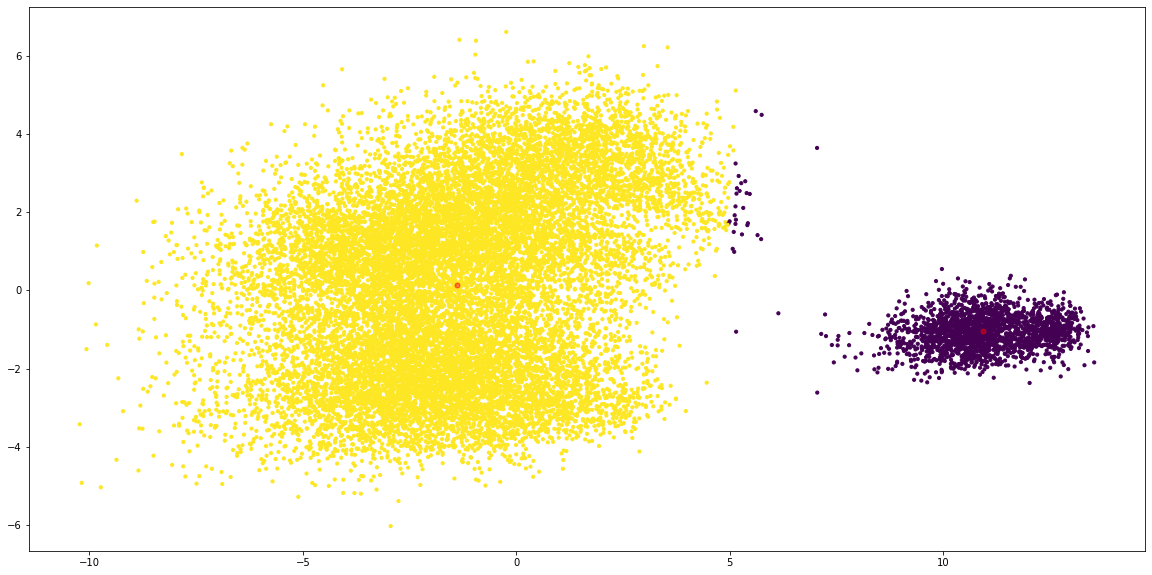

In [160]:
#finding the assigned centres
labels=list()
for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        labels.append(ind)
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(centres[:, 0], centres[:, 1], c='red', s=25, alpha=0.5);

In [161]:
PCA_dataset1 = pd.DataFrame(data =skillsPCA , columns = ['c1', 'c2'] )
X=PCA_dataset1.to_numpy()
from random import randint
from random import seed
centres=list()
seed(1)
for i in range(4):
    val=randint(0,len(X))
    centres.append(X[val])
import copy 
centres=np.array(centres)
#print(centres)
old=copy.deepcopy(centres)
centres=kmeans(X,centres,4)
error = np.linalg.norm(centres-old)
print("error:",error) 
max_itr=100
i=0
while(error!=0.0 and i<max_itr):
    centres=kmeans(X,centres,4) 
    error = np.linalg.norm(centres-old)
    print("error",error)
    old=copy.deepcopy(centres) 
    i=i+1

error: 5.557621352684314
error 7.305015714500693
error 2.032461048279049
error 2.209727660606318
error 2.466357811349489
error 1.4706251390023337
error 0.6079345942458384
error 0.3976634958283366
error 0.2489984552856083
error 0.1727668480774702
error 0.13619787702250102
error 0.10457326600489529
error 0.07992206920156246
error 0.05511243220421848
error 0.03767519862918967
error 0.029507476613705258
error 0.03132667437199276
error 0.021611212288588998
error 0.016746216576596702
error 0.015625334451973838
error 0.01503524859257378
error 0.008015569099025765
error 0.008470283649907106
error 0.008176793883653185
error 0.008810981111925338
error 0.007437857782327008
error 0.006404958443763663
error 0.005882853057514346
error 0.007162897358355759
error 0.004855962650485623
error 0.0027497974526701236
error 0.002698960872577108
error 0.0034871889664875692
error 0.00406365755749925
error 0.0027000084128115612
error 0.0008172241937648365
error 0.0005665378383319507
error 0.0006073156579289224


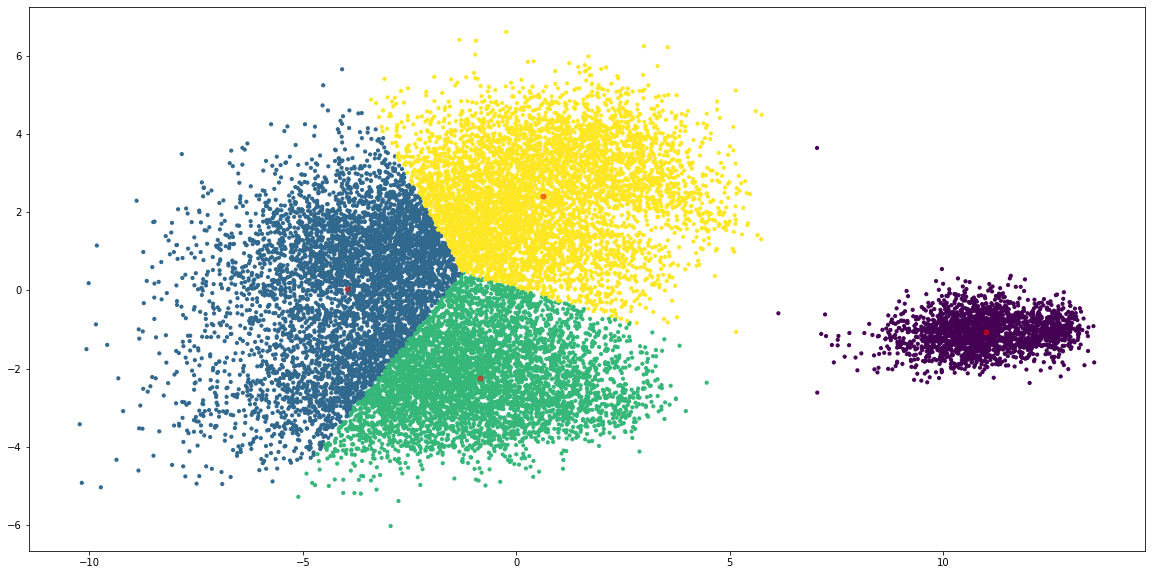

In [162]:
#finding the assigned centres
labels=list()
for i in X:
        dis=np.sqrt(np.sum((centres-i)**2,axis=1))
        dis=list(dis)
        #we get the distance of each element from each centre
        ind=dis.index(min(dis))
        labels.append(ind)
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(centres[:, 0], centres[:, 1], c='red', s=25, alpha=0.5);

In [ ]:
--------------------------------TASK 2 --------------------------------------------------------------------------------